In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
oil = pd.read_csv('./oil.csv')
holidays = pd.read_csv('./holidays_events.csv')
stores = pd.read_csv('./stores.csv')
test = pd.read_csv('./test.csv', index_col='id')
train = pd.read_csv('./train.csv', index_col='id')
transactions = pd.read_csv('./transactions.csv')

In [110]:
tables = {'oil':oil.shape, 
          'holidays':holidays.shape, 
          'stores':stores.shape, 
          'transactions':transactions.shape,
          'train':train.shape,
          'test':test.shape}

for i in tables:
     print(f'The shape of {i} is {tables[i]}')

The shape of oil is (1218, 2)
The shape of holidays is (350, 6)
The shape of stores is (54, 5)
The shape of transactions is (83488, 3)
The shape of train is (3000888, 5)
The shape of test is (28512, 4)


In [111]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [112]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [113]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [114]:
transactions.store_nbr.unique()

array([25,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39,
       40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 36, 53, 20, 29, 21,
       42, 22, 52])

In [115]:
train.store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

In [116]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [117]:
stores_transactions = stores.join(transactions.set_index('store_nbr'), on='store_nbr')

In [118]:
oil_holidays = oil.join(holidays.set_index('date'), on='date')

In [119]:
total_info = oil_holidays.join(stores_transactions.set_index('date'), on='date',lsuffix='_holiday', rsuffix='_store')

In [120]:
total_info.head()

,date,dcoilwtico,type_holiday,locale,locale_name,description,transferred,store_nbr,city,state,type_store,cluster,transactions
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,25.0,Salinas,Santa Elena,D,1.0,770.0
1,2013-01-02,93.14,NaN,NaN,NaN,NaN,NaN,1.0,Quito,Pichincha,D,13.0,2111.0
1,2013-01-02,93.14,NaN,NaN,NaN,NaN,NaN,2.0,Quito,Pichincha,D,13.0,2358.0
1,2013-01-02,93.14,NaN,NaN,NaN,NaN,NaN,3.0,Quito,Pichincha,D,8.0,3487.0
1,2013-01-02,93.14,NaN,NaN,NaN,NaN,NaN,4.0,Quito,Pichincha,D,9.0,1922.0


In [121]:
total_info.isnull().sum()

date                0
dcoilwtico       1964
type_holiday    50797
locale          50797
locale_name     50797
description     50797
transferred     50797
store_nbr          16
city               16
state              16
type_store         16
cluster            16
transactions       16
dtype: int64

In [122]:
test

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...
3029395,2017-08-31,9,POULTRY,1
3029396,2017-08-31,9,PREPARED FOODS,0
3029397,2017-08-31,9,PRODUCE,1


In [123]:
train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


<AxesSubplot:xlabel='date'>

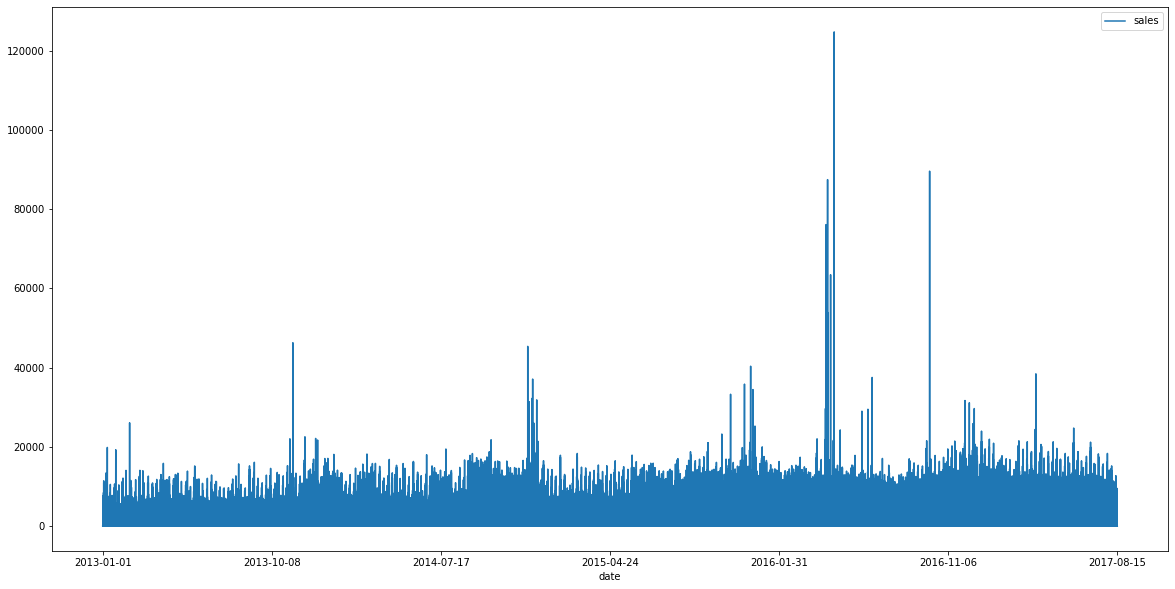

In [124]:
train[['date','sales']].set_index('date').plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

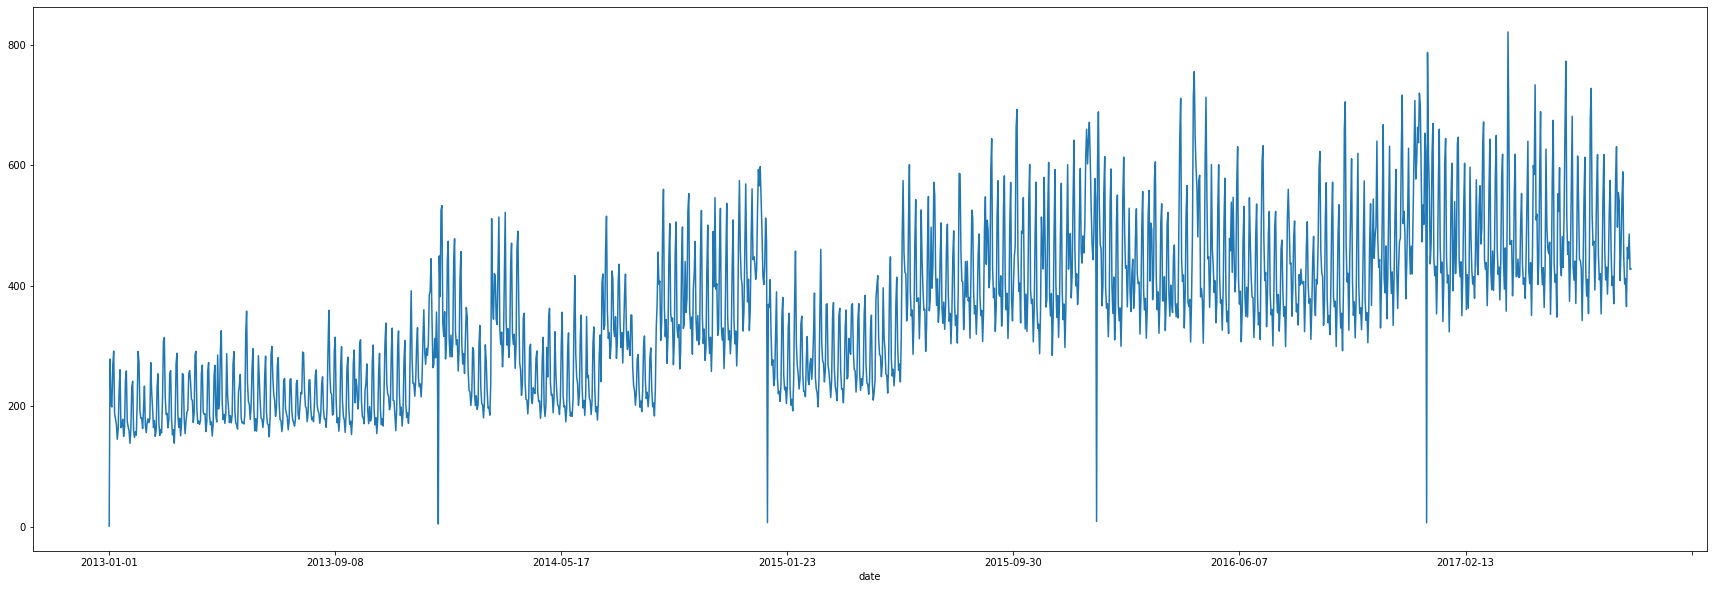

In [125]:
train.groupby('date').mean().sales.plot(figsize=(30,10))

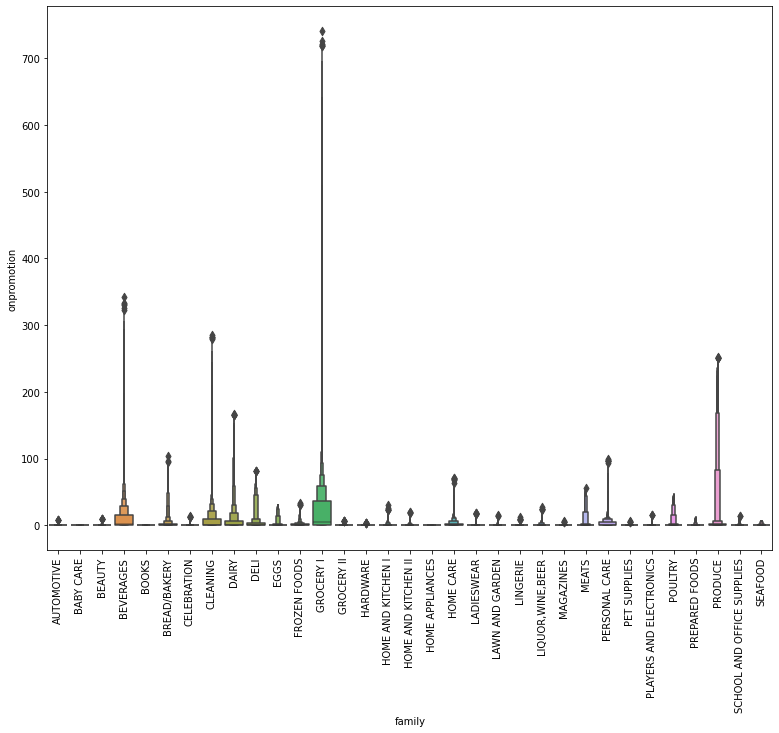

In [126]:
plt.figure(figsize=(13,10))
sns.boxenplot(data=train, x='family', y='onpromotion')
plt.xticks(rotation=90);

In [127]:
simple_train = train.groupby('date').mean()
simple_test = test.groupby('date').mean()

In [128]:
simple_train = simple_train.drop(['store_nbr','onpromotion'], axis=1)
simple_test = simple_test.drop(['store_nbr','onpromotion'], axis=1)

In [129]:
simple_train

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [130]:
simple_test

""
date
2017-08-16
2017-08-17
2017-08-18
2017-08-19
2017-08-20
2017-08-21
2017-08-22
2017-08-23
2017-08-24


# Train Test Split # 

Using the test sample let's take out a sequence of finite length to make a forcasting with a RNN model

In [131]:
test_size = len(simple_test)

In [132]:
test_ind = len(simple_train)-test_size

In [133]:
train_f = simple_train.iloc[:test_ind]
test_f = simple_train.iloc[test_ind:]

In [134]:
train_f.tail()

,sales
date,
2017-07-26,415.630216
2017-07-27,370.286098
2017-07-28,468.630574
2017-07-29,579.299027
2017-07-30,630.613063


In [135]:
test_f.tail()

,sales
date,
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618
2017-08-14,427.004717
2017-08-15,427.980884


# Scale Data # 

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [137]:
train_scaled = scaler.fit_transform(train_f)
test_scaled = scaler.transform(test_f)

Using the Time series Generator from tensorflow to generate batches of temporal data

In [138]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [139]:
length = 12
#Different length for the batch than the one given for the simle test data
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=1)

In [140]:
generator[100]

(array([[[0.20588627],
         [0.21353502],
         [0.30873574],
         [0.32583496],
         [0.23018431],
         [0.22656889],
         [0.22763604],
         [0.1913037 ],
         [0.21161368],
         [0.31314657],
         [0.33083566],
         [0.22345672]]]),
 array([[0.20511563]]))

In [141]:
X, y = generator[0]

In [142]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.33793656 0.24575956 0.24096585 0.3251044  0.35409666
 0.22841127 0.21624137 0.20541207 0.17559581 0.19665309 0.27437641]
Predict this y: 
 [[0.31640126]]


# Create NN model #

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional

In [144]:
n_features = 1

In [145]:
model = Sequential()

model.add(Bidirectional(GRU(100, activation='relu', input_shape=(length, n_features))))
#model.add(GRU(50, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

In [147]:
early_stop = EarlyStopping(monitor='val_loss',patience=6)

In [148]:
validation_generator = TimeseriesGenerator(test_scaled,test_scaled, length=length, batch_size=1)

In [149]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

/var/folders/gg/8rlhp3296770kr3vmmn424200000gn/T/ipykernel_8849/3502985036.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,


Epoch 1/20
1656/1656 [==============================] - 23s 12ms/step - loss: 0.0130 - accuracy: 6.0386e-04 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 2/20
1656/1656 [==============================] - 11s 7ms/step - loss: 0.0095 - accuracy: 6.0386e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 3/20
1656/1656 [==============================] - 13s 8ms/step - loss: 0.0081 - accuracy: 6.0386e-04 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 4/20
1656/1656 [==============================] - 10s 6ms/step - loss: 0.0066 - accuracy: 6.0386e-04 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 5/20
1656/1656 [==============================] - 9s 6ms/step - loss: 0.0062 - accuracy: 6.0386e-04 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 6/20
1656/1656 [==============================] - 10s 6ms/step - loss: 0.0055 - accuracy: 6.0386e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 7/20
1656/1656 [==============================] - 11s 6ms/step - loss: 0.005

<AxesSubplot:>

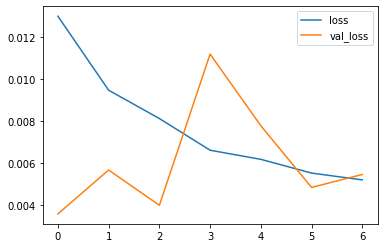

In [150]:
pd.DataFrame(data=model.history.history)[['loss','val_loss']].plot()

In [151]:
first_eval_batch = train_scaled[-length:]

In [152]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)

In [153]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 425ms/step


array([[0.5857527]], dtype=float32)

In [154]:
test_scaled[0]

array([0.60479388])

In [155]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test_f)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


# Inverse Transoformations and Compare #

In [156]:
true_predictions = scaler.inverse_transform(test_predictions)

In [157]:
test_f['Predictions'] = true_predictions

/var/folders/gg/8rlhp3296770kr3vmmn424200000gn/T/ipykernel_8849/1953099910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

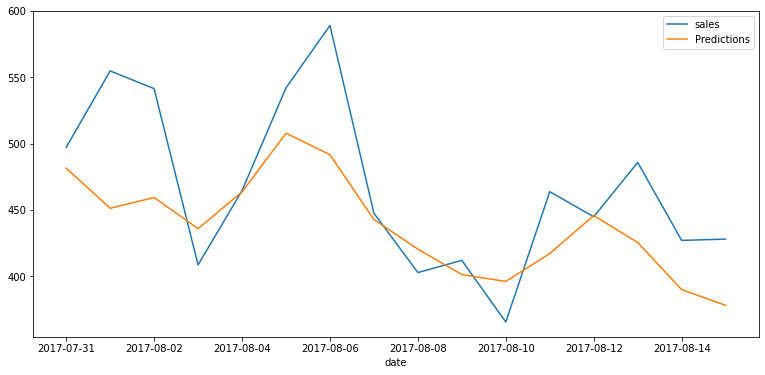

In [158]:
test_f.plot(figsize=(13,6))

# Retrain and Forecasting #

Now we are gonna work with the whole test set, without any validation, since we checked that our RNN model works properlyy, without over- or underfitting.

In [159]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(simple_train)

In [160]:
length = 12
#Different length for the batch than the one given for the simle test data
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [161]:
model = Sequential()

model.add(Bidirectional(GRU(100, activation='relu', input_shape=(length, n_features))))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [162]:
model.fit_generator(generator,epochs=20)

/var/folders/gg/8rlhp3296770kr3vmmn424200000gn/T/ipykernel_8849/3989200883.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20)


Epoch 1/20
1672/1672 [==============================] - 20s 10ms/step - loss: 0.0131 - accuracy: 5.9809e-04
Epoch 2/20
1672/1672 [==============================] - 12s 7ms/step - loss: 0.0093 - accuracy: 5.9809e-04
Epoch 3/20
1672/1672 [==============================] - 11s 7ms/step - loss: 0.0078 - accuracy: 5.9809e-04
Epoch 4/20
1672/1672 [==============================] - 11s 6ms/step - loss: 0.0070 - accuracy: 5.9809e-04
Epoch 5/20
1672/1672 [==============================] - 11s 6ms/step - loss: 0.0064 - accuracy: 5.9809e-04
Epoch 6/20
1672/1672 [==============================] - 10s 6ms/step - loss: 0.0060 - accuracy: 5.9809e-04
Epoch 7/20
1672/1672 [==============================] - 10s 6ms/step - loss: 0.0055 - accuracy: 5.9809e-04
Epoch 8/20
1672/1672 [==============================] - 11s 6ms/step - loss: 0.0050 - accuracy: 5.9809e-04
Epoch 9/20
1672/1672 [==============================] - 10s 6ms/step - loss: 0.0048 - accuracy: 5.9809e-04
Epoch 10/20
1672/1672 [=============

In [163]:
forecast = []

periods = test_size

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape(1,length, n_features)

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 23ms/step


In [164]:
forecast = full_scaler.inverse_transform(forecast)

In [165]:
simple_train

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [166]:
forecast_index = pd.date_range(start='2017-08-16', periods=periods, freq='D')

In [167]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

In [168]:
simple_train.index = simple_train.index.astype('datetime64[ns]')

In [169]:
forecast_df.index

DatetimeIndex(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', freq='D')

(17318.0, 17409.0)

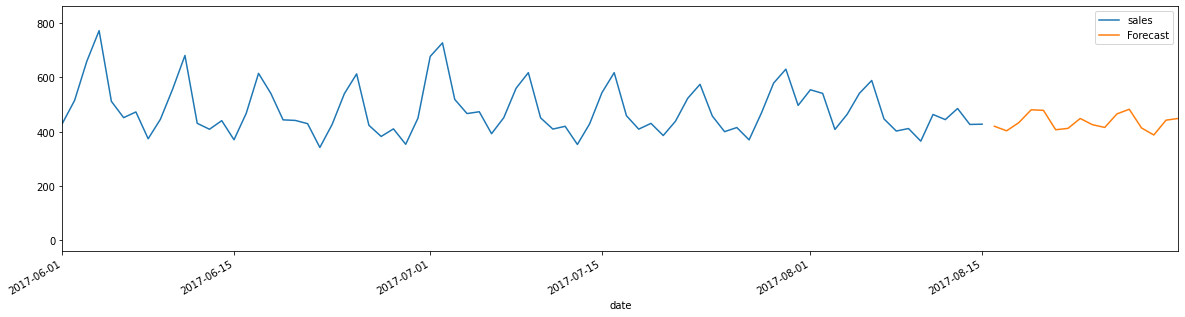

In [170]:
ax = simple_train.plot(figsize=(20,5))
forecast_df.plot(ax=ax)
plt.xlim('2017-06-01','2017-08-31')